In [32]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [33]:
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [34]:
mnist.train.images.shape

(55000, 784)

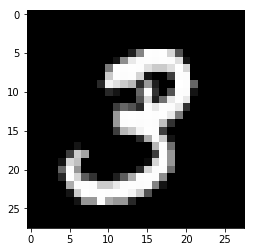

In [35]:
plt.imshow(Image.fromarray((mnist.train.images[1] * 255).astype(np.uint8).reshape([28,28])))

In [36]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [37]:
batch_images,batch_labels = mnist.train.next_batch(32)

In [38]:
batch_images.shape

(32, 784)

In [39]:
batch_labels.shape

(32, 10)

In [40]:
#g构建一个图

with tf.Graph().as_default() as g:
    inputs = tf.placeholder(shape=[None,784],dtype=tf.float32)
    labels = tf.placeholder(shape=[None,10],dtype=tf.float32)
    
    out_weight = tf.Variable(tf.random_normal([784,10]))
    out_bias = tf.Variable(tf.zeros([10, ]))
    
    out_z = tf.matmul(inputs,out_weight) + out_bias
    output = tf.nn.softmax(out_z) #[None,10]
        
    
    loss = tf.reduce_mean( - tf.reduce_sum(labels * tf.log(output + 1e-17),axis=1))
    
    acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(output,axis=1),
                                          tf.argmax(labels,axis=1)),tf.float32))
    
   #定义梯度下降法优化器 
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)

In [41]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    #训练模型
    for i in range(10000):
        batch_images,batch_labels = mnist.train.next_batch(32)
        res_loss,_ = sess.run([loss,train_op],feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        #输出代价并验证模型
        if i % 500 == 0:
            accs = []
            for j in range(10000 // 32):
                batch_images,batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc,feed_dict={inputs: batch_images,labels: batch_labels})
                accs.append(res_acc)
            
            m_acc = np.mean(accs)
            print('loss %2.4f, acc %.4f ' % (res_loss, m_acc))

loss 14.8982, acc 0.1070
loss 7.3417, acc 0.3111
loss 2.9135, acc 0.4523
loss 2.5354, acc 0.5452
loss 4.2585, acc 0.6070
loss 1.4865, acc 0.6472
loss 1.1665, acc 0.6780
loss 1.9068, acc 0.6996
loss 1.9513, acc 0.7171
loss 1.2706, acc 0.7297
loss 1.8372, acc 0.7437
loss 1.4970, acc 0.7541
loss 1.6350, acc 0.7632
loss 1.0724, acc 0.7732
loss 0.1888, acc 0.7779
loss 1.0991, acc 0.7833
loss 1.5118, acc 0.7895
loss 1.2012, acc 0.7933
loss 0.8494, acc 0.8001
loss 1.1994, acc 0.8037
